## 공공 인공지능 Open API 활용

In [1]:
import urllib3, json, base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

- 여러가지 객체 검출

In [4]:
with open('etriaikey.txt') as f:
    ai_key = f.read()

In [5]:
img_file = '사진/공원.jpg'
img_type = img_file.split('.')[-1]
img_type

'jpg'

In [6]:
# JFIF 타입은 JPG로 변경
img_type = 'jpg' if img_type == 'jfif' else img_type

In [7]:
with open(img_file, "rb") as file:
    img_contents = base64.b64encode(file.read()).decode("utf8")

In [8]:
request_json = {
    "access_key": ai_key,
    "argument": {
        "type": img_type,
        "file": img_contents
    }
}

In [9]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

In [10]:
response.status

200

In [11]:
result = json.loads(response.data)
obj_list = result['return_object']['data']

- 시각화

In [16]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

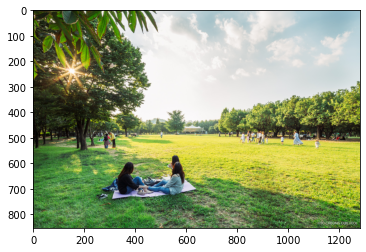

In [17]:
img = Image.open(img_file)
plt.imshow(img);

In [18]:
draw = ImageDraw.Draw(img)
for obj in obj_list:
    name = obj['class']
    x = int(obj['x'])
    y = int(obj['y'])
    w = int(obj['width'])
    h = int(obj['height'])
    draw.rectangle(((x,y), (x+w,y+h)), outline=(255,0,0), width=2)
    draw.text((x+10, y-20), name, font=ImageFont.truetype('AppleGothic.ttf',20), fill=(0,0,255))

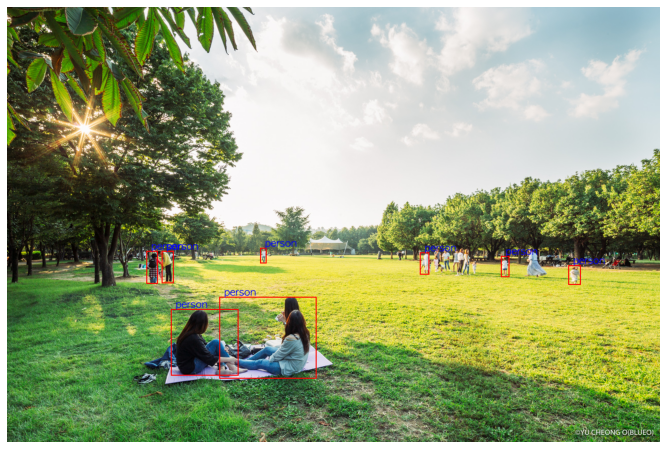

In [19]:
plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis('off')
plt.show()

- 여러 개의 그림에서 객체 검출하기

In [20]:
from glob import glob
glob('사진/*.jpg')

['사진/동물원.jpg', '사진/dog.jpg', '사진/공원.jpg']

In [21]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [24]:
import warnings
warnings.filterwarnings('ignore')

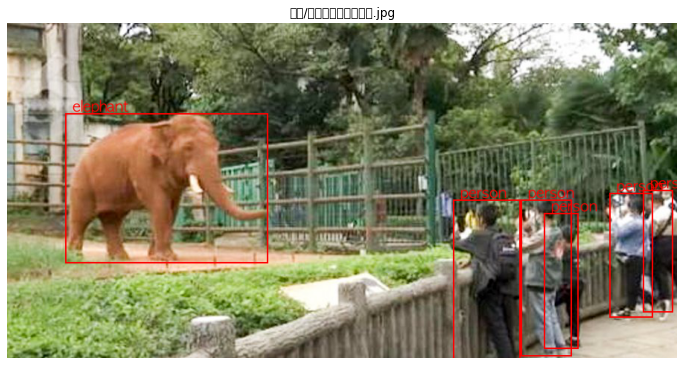

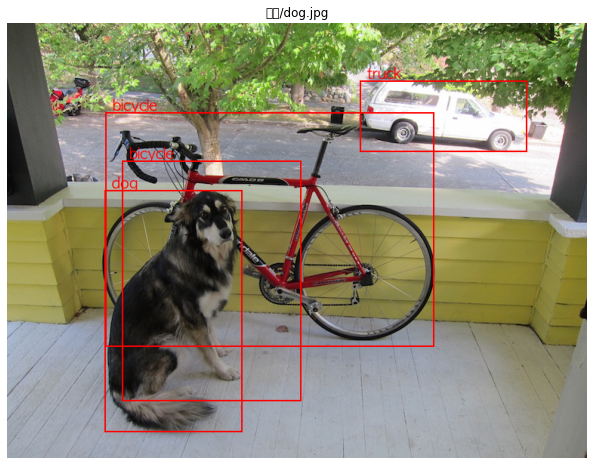

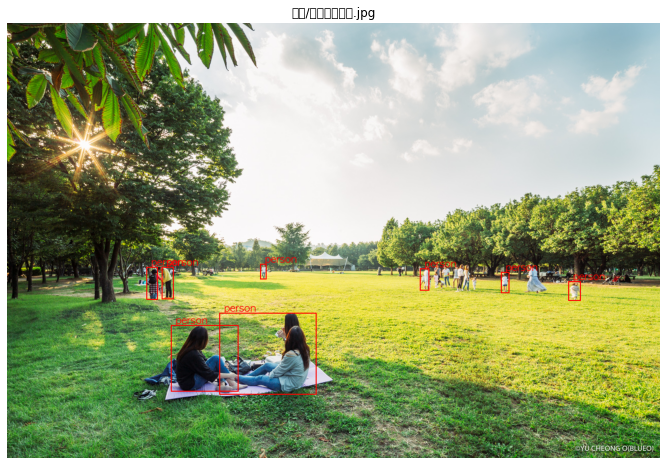

In [25]:
# http = urllib3.PoolManager()          # 프로그램 안에서 한번만 실행하면 됨
for img_file in glob('사진/*.jpg'):
    img_type = img_file.split('.')[-1]
    img_type = 'jpg' if img_type == 'jfif' else img_type
    with open(img_file, "rb") as file:
        img_contents = base64.b64encode(file.read()).decode("utf8")

    request_json = {
        "access_key": ai_key,
        "argument": {
            "type": img_type,
            "file": img_contents
        }
    }
    response = http.request(
        "POST",
        openApiURL,
        headers={"Content-Type": "application/json; charset=UTF-8"},
        body=json.dumps(request_json)
    )
    if response.status != 200:
        continue

    result = json.loads(response.data)
    obj_list = result['return_object']['data']
    img = Image.open(img_file)
    draw = ImageDraw.Draw(img)
    for obj in obj_list:
        name = obj['class']
        x = int(obj['x'])
        y = int(obj['y'])
        w = int(obj['width'])
        h = int(obj['height'])
        draw.rectangle(((x,y), (x+w,y+h)), outline=(255,0,0), width=2)
        draw.text((x+10, y-20), name, font=ImageFont.truetype('AppleGothic.ttf',20), fill=(255,0,0))

    plt.figure(figsize=(12,8))
    plt.imshow(img)
    plt.axis('off'), plt.title(img_file.split('\\')[-1])
    plt.show()